In [1]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/minedataset/cleaned data - Sheet1.csv')

In [4]:
df['classes_id'].value_counts()

0    116
1     76
2     30
4     29
5     27
3     24
Name: classes_id, dtype: int64

In [5]:
df

,accident_code,accident_type,accident_classes,classes_id,reason
0,335,Dumpers,Dumpers,0,While dumpers were being guided by an official...
1,335,Dumpers,Dumpers,0,While a helper of a tipper was removing stop b...
2,335,Dumpers,Dumpers,0,While a loaded dumper having a capacity of 85 ...
3,335,Dumpers,Dumpers,0,While a loaded dumper having a capacity of 170...
4,335,Dumpers,Dumpers,0,While a 35T dumper was being reversed on coal ...
...,...,...,...,...,...
297,449,Other Non-Transportation Machinery,Other Heavy Earth Moving Machinery and non tra...,5,While a Powered Support was being raised in a ...
298,449,Other Non-Transportation Machinery,Other Heavy Earth Moving Machinery and non tra...,5,While a helper had approached in the close pro...
299,449,Other Non-Transportation Machinery,Other Heavy Earth Moving Machinery and non tra...,5,While a fan attendant approached near the driv...
300,449,Other Non-Transportation Machinery,Other Heavy Earth Moving Machinery and non tra...,5,"While a crew of five persons, engaged in measu..."


In [6]:
df=df[['reason','accident_classes']]

In [7]:
df

,reason,accident_classes
0,While dumpers were being guided by an official...,Dumpers
1,While a helper of a tipper was removing stop b...,Dumpers
2,While a loaded dumper having a capacity of 85 ...,Dumpers
3,While a loaded dumper having a capacity of 170...,Dumpers
4,While a 35T dumper was being reversed on coal ...,Dumpers
...,...,...
297,While a Powered Support was being raised in a ...,Other Heavy Earth Moving Machinery and non tra...
298,While a helper had approached in the close pro...,Other Heavy Earth Moving Machinery and non tra...
299,While a fan attendant approached near the driv...,Other Heavy Earth Moving Machinery and non tra...
300,"While a crew of five persons, engaged in measu...",Other Heavy Earth Moving Machinery and non tra...


In [8]:
possible_labels = df.accident_classes.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Dumpers': 0,
 'Fall of roof_sides_overhangs': 1,
 'Wheeled Trackless': 2,
 'Loading Machines': 3,
 'Fall of Person from Height/into Depth and on same level': 4,
 'Other Heavy Earth Moving Machinery and non transportation machinery': 5}

In [9]:
df['label'] = df.accident_classes.replace(label_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.head()

,reason,accident_classes,label
0,While dumpers were being guided by an official...,Dumpers,0
1,While a helper of a tipper was removing stop b...,Dumpers,0
2,While a loaded dumper having a capacity of 85 ...,Dumpers,0
3,While a loaded dumper having a capacity of 170...,Dumpers,0
4,While a 35T dumper was being reversed on coal ...,Dumpers,0


In [11]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
#                                                   df.label.values, 
#                                                   test_size=0.15, 
#                                                   random_state=42,
#                                                   stratify=df.label.values
#                                                   )
from sklearn.model_selection import KFold

# Define the number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Split the data into folds
for train_index, val_index in kf.split(df):
    X_train, X_val = df.index.values[train_index], df.index.values[val_index]
    y_train, y_val = df.label.values[train_index], df.label.values[val_index]

In [12]:
df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
df.groupby(['accident_classes', 'label', 'data_type']).count()

reason
accident_classes                                   label data_type        
Dumpers                                            0     train          92
                                                         val            24
Fall of Person from Height/into Depth and on sa... 4     train          24
                                                         val             5
Fall of roof_sides_overhangs                       1     train          60
                                                         val            16
Loading Machines                                   3     train          20
                                                         val             4
Other Heavy Earth Moving Machinery and non tran... 5     train          21
                                                         val             6
Wheeled Trackless                                  2     train          25
                                                         val             5

In [14]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

This code is using the BertTokenizer to tokenize and encode the training and validation text data. The batch_encode_plus method is being used to process the text data in batches. The text data is stored in the 'reason' column of the dataframe df, and the method is only selecting the rows where the 'data_type' column is 'train' for the training data and 'val' for the validation data.

The method is also being passed several parameters:

add_special_tokens is set to True, which adds special tokens to the beginning and end of the encoded text to indicate the start and end of the sentence.
return_attention_mask is set to True, which returns a binary mask indicating which tokens are padding and which are not.
pad_to_max_length is set to True, which pads the encoded text to a maximum length of 256 tokens.
max_length is set to 256, which is the maximum length of the encoded text.
return_tensors is set to 'pt', which returns the encoded text as PyTorch tensors.
After encoding the data, the code creates several variables to store the encoded data:

input_ids_train and input_ids_val store the input ids for the training and validation data.
attention_masks_train and attention_masks_val store the attention masks for the training and validation data.
labels_train and labels_val store the labels for the training and validation data. The labels are converted to PyTorch tensors using the torch.tensor method.





In [15]:
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].reason.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].reason.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [16]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [17]:
len(dataset_train), len(dataset_val)

(242, 60)

In [18]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

****This code creates two data loaders, one for the training data and one for the validation data, using the DataLoader class from PyTorch's torch.utils.data library. The data loaders allow the data to be fed into the model in small batches.

**The first data loader, dataloader_train, is created using the dataset_train variable, and it's passed a RandomSampler object and a batch size of 3. The RandomSampler is used to randomly select samples from the dataset for each iteration.

**The second data loader, dataloader_validation, is created using the dataset_val variable, and it's passed a SequentialSampler object and a batch size of 3. The SequentialSampler is used to select samples from the dataset in a sequential order, one after the other, for each iteration.
**
Both data loaders will be used to iterate over the data during training and validation phases.******

In [19]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [20]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=5e-5, 
                  eps=1e-8)

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [21]:
epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [22]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [23]:
import numpy as np

In [24]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [26]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [27]:
import os

output_dir = 'data_volume'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [28]:

from sklearn.metrics import f1_score

In [29]:
from sklearn.metrics import accuracy_score


In [30]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    
    

   
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
   
    

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.350366179957802
Validation loss: 0.8893568702042103
F1 Score (Weighted): 0.6058651026392962


Epoch 2:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.7671692288354223
Validation loss: 0.8222366701811552
F1 Score (Weighted): 0.8204242424242423


Epoch 3:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.46853629791718204
Validation loss: 0.6724491474567913
F1 Score (Weighted): 0.8536649831649832


Epoch 4:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.2186998947793733
Validation loss: 0.48550759530044163
F1 Score (Weighted): 0.8791015531660694


Epoch 5:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.06864279000962406
Validation loss: 0.5272231046605157
F1 Score (Weighted): 0.8620166315166314


Epoch 6:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.054247853875786844
Validation loss: 0.5343828647397458
F1 Score (Weighted): 0.8395744876390038


Epoch 7:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.03329039486858097
Validation loss: 0.6050614720064914
F1 Score (Weighted): 0.8647026927672089


Epoch 8:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.019379885094728964
Validation loss: 0.5711934437858872
F1 Score (Weighted): 0.879183049012271


Epoch 9:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.002094887094255997
Validation loss: 0.5942695161007577
F1 Score (Weighted): 0.8633710832003051


Epoch 10:   0%|          | 0/81 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.0017835379241862232
Validation loss: 0.5889249770974857
F1 Score (Weighted): 0.86823880806803


In [31]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Class: Dumpers
Accuracy: 23/24

Class: Fall of roof_sides_overhangs
Accuracy: 15/16

Class: Wheeled Trackless
Accuracy: 0/5

Class: Loading Machines
Accuracy: 0/4

Class: Fall of Person from Height/into Depth and on same level
Accuracy: 4/5

Class: Other Heavy Earth Moving Machinery and non transportation machinery
Accuracy: 0/6



In [32]:
from sklearn.metrics import classification_report

val_predictions = predictions.argmax(axis=1)
val_true_vals = true_vals

val_classification_report = classification_report(val_true_vals, val_predictions, target_names=label_dict.keys())
print(val_classification_report)


                                                                     precision    recall  f1-score   support

                                                            Dumpers       0.61      0.96      0.74        24
                                       Fall of roof_sides_overhangs       0.88      0.94      0.91        16
                                                  Wheeled Trackless       0.00      0.00      0.00         5
                                                   Loading Machines       0.00      0.00      0.00         4
            Fall of Person from Height/into Depth and on same level       0.80      0.80      0.80         5
Other Heavy Earth Moving Machinery and non transportation machinery       0.00      0.00      0.00         6

                                                           accuracy                           0.70        60
                                                          macro avg       0.38      0.45      0.41        60
                 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


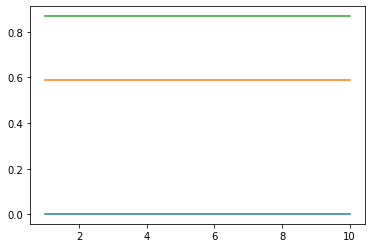

In [33]:
import matplotlib.pyplot as plt

# Initialize lists to store the training loss, validation loss, and F1 score for each epoch
training_loss = []
validation_loss = []
f1_score = []

# Add the training loss, validation loss, and F1 score for each epoch to the corresponding list
for epoch in range(1, epochs+1):
    # ... code for training and evaluating the model ...
    training_loss.append(loss_train_avg)
    validation_loss.append(val_loss)
    f1_score.append(val_f1)

# Plot the training loss, validation loss, and F1 score over the number of epochs
plt.plot(range(1, epochs+1), training_loss, label='Training Loss')
plt.plot(range(1, epochs+1), validation_loss, label='Validation Loss')
plt.plot(range(1, epochs+1), f1_score, label='F1 Score')


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a pandas DataFrame
df = pd.read_csv("/kaggle/input/minenotcleaned/data_2010_to_2015.csv")

In [35]:
df

,Accident Code,Accident Reason,Date,Time,State,Mine,District,Owner Company,No. of persons died along,Name of person,Occupation of the person,Gender of the person,Age of the person,Reason,Remedy,Shift,SubShifts
0,111,Fall of Roof,2010-01-02,12:00:00,West Bengal,SHANKARPUR,Burdwan,Eastern Coalfields Ltd.,0,Ismail Mia,Dresser,Male,40,While a dresser was engaged for dressing coal ...,Had the roof of the gallery been made and kept...,2,1C
1,111,Fall of Roof,2010-02-24,13:30:00,Madhya Pradesh,BARTARAI,Anuppur,South Eastern Coalfields Ltd.,0,Poshan Das,Support Mistry,Male,44,While a driller was pulling a drilling cable a...,Had the roof of the working place been made an...,2,1D
2,111,Fall of Roof,2010-03-20,09:45:00,Chhattisgarh,BALGI PROJECT,Korba,South Eastern Coalfields Ltd.,0,Dhani Ram,Explosive Carrier,Male,47,While an explosive carrier in stooping positio...,Had i) the person carefully examined his worki...,2,1B
3,111,Fall of Roof,2010-04-03,14:40:00,Madhya Pradesh,BIRSINGHPUR,Umaria,South Eastern Coalfields Ltd.,0,Daya Ram,Roof Stitcher,Male,56,While a roof stitcher was drinking water from ...,Had the roof of the gallery been made and kept...,2,2A
4,111,Fall of Roof,2010-04-16,11:30:00,Chhattisgarh,RAJGAMAR 1&2 (PAWAN INCLINE ),Bilaspur,South Eastern Coalfields Ltd.,0,Kitab Singh,Cableman,Male,40,While SDL reached the junction of split and or...,Had i) the working place been carefully examin...,2,1C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,991,Irruption of Water,2015-04-06,12:04:00,Telangana,SRIRAMPUR NO.3 & 3 A,Adilabad,Singareni Collieries Company Ltd.,0,Pesaru Satyanarayana,Mining Sirdar,Male,51,While a mining sirdar was walking along a dip ...,-,2,1D
461,993,Drowning in Water,2015-03-01,07:55:00,Jharkhand,BASANTIMATA,Dhanbad,Bharat Coking Coal Ltd.,0,Manoranjan Pradhan,Shovel Optr( Con),Male,26,While a shovel was deployed for working on an ...,Had i) the system of dividing the mine into 4 ...,1,1A
462,993,Drowning in Water,2015-06-21,14:00:00,Maharashtra,CHANDA RAYATWARI,Chandrapur,Western Coalfields Ltd.,0,Sarnath Bapu Dhoble,Engineer,Male,55,While an engineer went alone at the sump area ...,Had the deceased not gone alone near the under...,2,1D
463,993,Drowning in Water,2015-10-15,08:03:00,Gujarat,"SURKHA(NORTH) LIGNITE MINE,",Bhavanagar,Gujarat Mineral Development Corpn. Ltd.,0,Paresh Kr. Samantray,Agent,Male,42,While an agent-cum-manager of the mine during ...,Had the person during inspection of opencast w...,2,1B


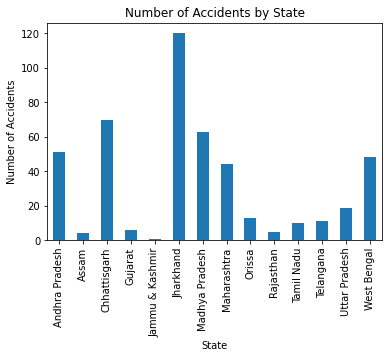

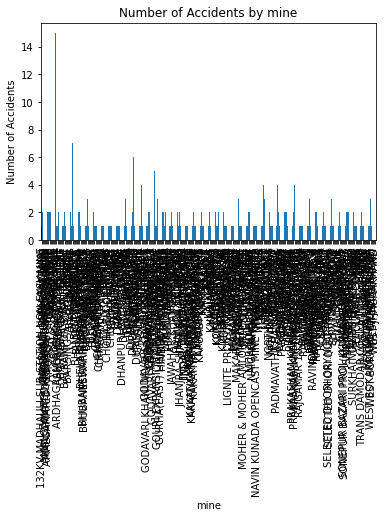

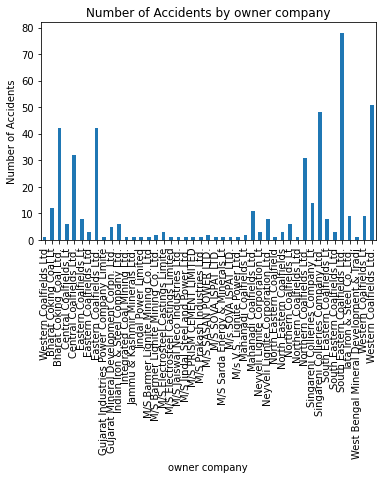

In [36]:


# Group the data by state and calculate the number of accidents in each state
state_group = df.groupby("State").count()["Accident Reason"]

# Plot the number of accidents by state in a bar chart
state_group.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by State")
plt.show()

# Group the data by mine and calculate the number of accidents in each mine
mine_group = df.groupby("Mine").count()["Accident Reason"]

# Plot the number of accidents by mine in a bar chart
mine_group.plot(kind="bar")
plt.xlabel("mine")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by mine")
plt.show()

# Group the data by owner company and calculate the number of accidents in each owner company
owner_company_group = df.groupby("Owner Company").count()["Accident Reason"]

# Plot the number of accidents by owner company in a bar chart
owner_company_group.plot(kind="bar")
plt.xlabel("owner company")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by owner company")
plt.show()



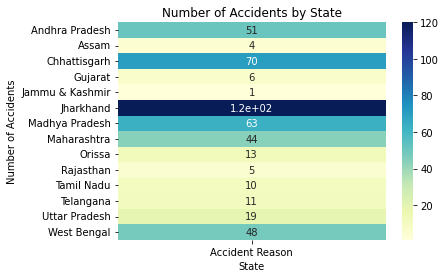

In [37]:
import seaborn as sns

# Create a pivot table to show the number of accidents by state
pivot_table = df.pivot_table(index='State', values='Accident Reason', aggfunc='count')

# Create a heatmap of the pivot table
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by State")
plt.show()


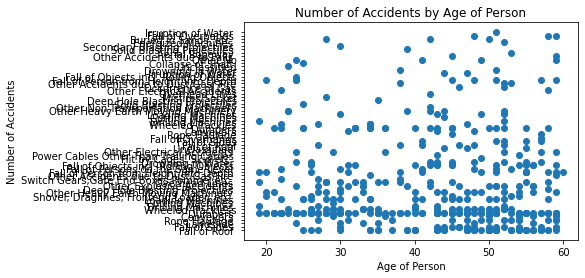

In [38]:
# Create a scatter plot to show the relationship between the age of the person and the number of accidents
plt.scatter(df["Age of the person"], df["Accident Reason"])
plt.xlabel("Age of Person")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Age of Person")


plt.show()


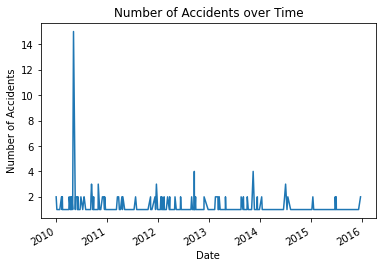

In [39]:
# convert date column to date format
df["date"] = pd.to_datetime(df["Date"])

# Create a line plot to show the trend of accidents over time
df.groupby("date").count()["Accident Reason"].plot()
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents over Time")
plt.show()


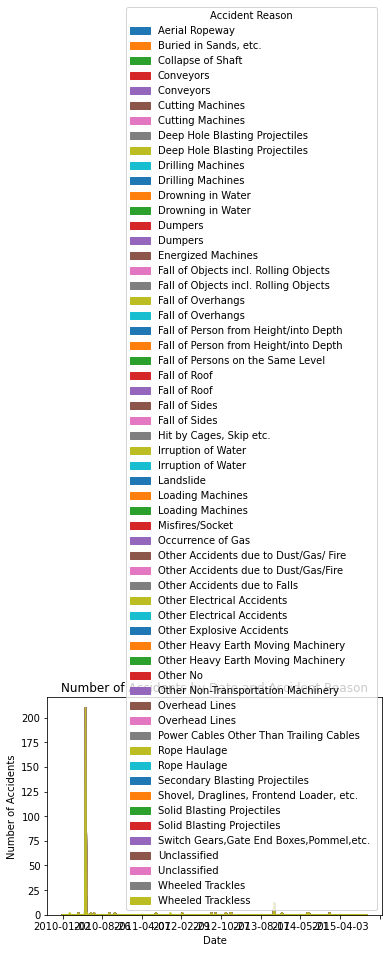

In [40]:
# Create a pivot table to show the number of accidents by date and accident reason
pivot_table = df.pivot_table(index='Date', columns='Accident Reason', values='No. of persons died along', aggfunc='sum')

# Plot the pivot table as a stacked area chart
pivot_table.plot(kind='area', stacked=True)
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Date and Accident Reason")
plt.show()


**Accident rate by mine or state: Instead of calculating the probability of an accident occurring in a certain mine or state, you can calculate the accident rate (number of accidents per year) in each mine or state. This will give you an idea of which mines or states have the highest accident rates.**

In [41]:
df['date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year

# Create a pivot table to show the number of accidents by mine or state and year
mine_pivot = df.pivot_table(index=['Mine','Year'], values='Accident Reason', aggfunc='count')
# or
state_pivot = df.pivot_table(index=['State','Year'], values='Accident Reason', aggfunc='count')

# Divide the number of accidents by the number of years in the dataset to get the accident rate
mine_pivot["accident rate"] = mine_pivot["Accident Reason"] / (df["Year"].max() - df["Year"].min() + 1)
# or
state_pivot["accident rate"] = state_pivot["Accident Reason"] / (df["Year"].max() - df["Year"].min() + 1)

# Sort the pivot table by accident rate in descending order to see which mines or states have the highest accident rates
mine_pivot.sort_values("accident rate", ascending=False)
#or
state_pivot.sort_values("accident rate", ascending=False)


Accident Reason  accident rate
State          Year                                
Jharkhand      2013               27       4.500000
               2010               27       4.500000
Chhattisgarh   2010               25       4.166667
Jharkhand      2012               23       3.833333
Madhya Pradesh 2010               20       3.333333
...                              ...            ...
Assam          2012                1       0.166667
Orissa         2014                1       0.166667
Assam          2010                1       0.166667
Orissa         2013                1       0.166667
Tamil Nadu     2015                1       0.166667

[63 rows x 2 columns]

**Accident rate by occupation: you can group the data by occupation of the person, and calculate the accident rate (number of accidents per year) for each occupation. This will give you an idea of which occupations are at the highest risk of accidents***
*

In [42]:
df['date'] = pd.to_datetime(df['Date'])
df['year'] = pd.DatetimeIndex(df['Date']).year
# Create a pivot table to show the number of accidents by occupation and year
occupation_pivot = df.pivot_table(index=['Occupation of the person','year'], values='Accident Reason', aggfunc='count')

# Divide the number of accidents by the number of years in the dataset to get the accident rate
occupation_pivot["accident rate"] = occupation_pivot["Accident Reason"] / (df["year"].max() - df["year"].min() + 1)

# Sort the pivot table by accident rate in descending order to see which occupation have the highest accident rates
occupation_pivot.sort_values("accident rate", ascending=False)


Accident Reason  accident rate
Occupation of the person year                                
Contractor Worker        2010                8       1.333333
Dumper Operator          2013                7       1.166667
General Mazdoor          2012                6       1.000000
                         2010                6       1.000000
Dumper Operator          2010                5       0.833333
...                                        ...            ...
E. P. Fitter Grade- D    2013                1       0.166667
E. P. Fitter             2013                1       0.166667
                         2010                1       0.166667
E P. Operator            2014                1       0.166667
Welder                   2015                1       0.166667

[345 rows x 2 columns]

<AxesSubplot:ylabel='accident rate'>

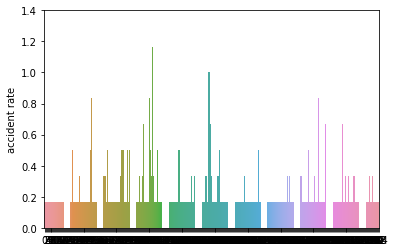

In [43]:
occupation_pivot_df = occupation_pivot["accident rate"].to_frame()
occupation_pivot_df.reset_index(inplace=True)
sns.barplot(x = occupation_pivot_df.index, y = occupation_pivot_df["accident rate"])


**Accident rate by gender: you can group the data by gender, and calculate the accident rate (number of accidents per year) for each gender. This will give you an idea of whether there are any differences in accident rates between men and women**

Text(0.5, 1.0, 'Accident Rate by Gender')

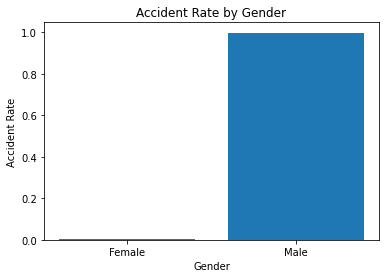

In [44]:
# Group the data by gender and calculate the number of accidents
gender_group = df.groupby("Gender of the person").count()["Accident Reason"]

# Calculate the accident rate by dividing the number of accidents by the total number of accidents
accident_rate_by_gender = gender_group / len(df)

# Plot the accident rate by gender in a bar chart
plt.bar(accident_rate_by_gender.index, accident_rate_by_gender)
plt.xlabel("Gender")
plt.ylabel("Accident Rate")
plt.title("Accident Rate by Gender")


**Accident rate by age: you can group the data by age of the person, and calculate the accident rate (number of accidents per year) for each age group. This will give you an idea of whether there are any differences in accident rates between different age groups**

Text(0.5, 1.0, 'Accident Rate by Age Group')

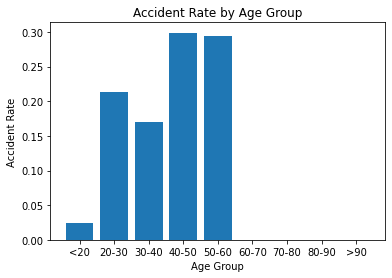

In [45]:
# Create age groups by dividing age into bins
df["age_group"] = pd.cut(df["Age of the person"], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=["<20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", ">90"])

# Group the data by age group and calculate the number of accidents
age_group = df.groupby("age_group").count()["Accident Reason"]

# Calculate the accident rate by dividing the number of accidents by the total number of accidents
accident_rate_by_age = age_group / len(df)

# Plot the accident rate by age group in a bar chart
plt.bar(accident_rate_by_age.index, accident_rate_by_age)
plt.xlabel("Age Group")
plt.ylabel("Accident Rate")
plt.title("Accident Rate by Age Group")


 use seaborn  for plotting

Text(0.5, 1.0, 'Accident Rate by Age Group')

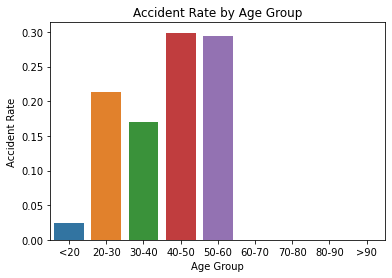

In [46]:
sns.barplot(x = accident_rate_by_age.index, y = accident_rate_by_age)
plt.xlabel("Age Group")
plt.ylabel("Accident Rate")
plt.title("Accident Rate by Age Group")


**Study the relationship between month and accident: accidents may be repeated due to some specific weather conditions**

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month


<AxesSubplot:xlabel='month', ylabel='count'>

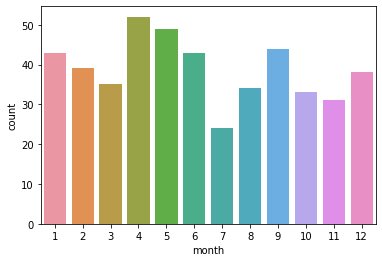

In [48]:
import seaborn as sns
sns.countplot(x='month', data=df)


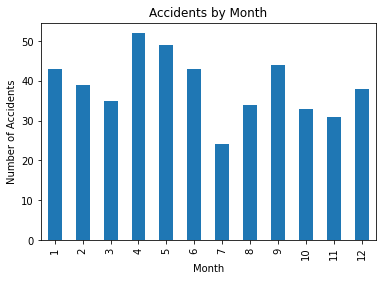

In [49]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Read in the mining fatality dataset
# df = pd.read_csv('mining_fatality_dataset.csv')

# Extract the month from the date column


# Group the data by month and count the number of accidents in each month
monthly_accidents = df.groupby('month').size()

# Plot the data in a bar chart
monthly_accidents.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Month')
plt.show()


** Study the relationship between date and accident: accidents may be taking place during some specific dates like month end or month start where more attention would have been given to administrative work.**

In [50]:
df['day_of_week'] = df['Date'].dt.dayofweek
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week'] = df['day_of_week'].map(days)


In [51]:
from calendar import day_name

df['day_of_week'] = df['Date'].dt.dayofweek
df['day_of_week'] = df['day_of_week'].apply(lambda x: day_name[x])


In [52]:
df['Date'] = pd.to_datetime(df['Date'])


In [53]:
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek


<AxesSubplot:xlabel='day_of_week'>

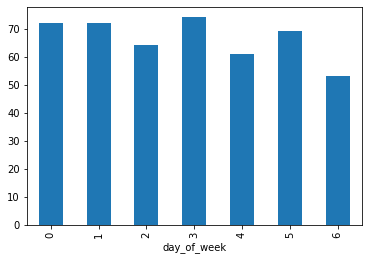

In [54]:
month_accidents = df.groupby('month').size()
month_accidents.plot(kind='bar')

# Group by day of the week and visualize the number of accidents that took place during each day
day_accidents = df.groupby('day_of_week').size()
day_accidents.plot(kind='bar')

In [55]:
# Filter data for specific month
df_june = df[df['month'] == 6]

# Filter data for specific day of the week
df_wednesday = df[df['day_of_week'] == 'Wednesday']

**Study the relationship between age and shift, subshift: persons of a specific age group may not able to perform their work during a specific shift or subshift**

In [56]:
# Group data by shift and subshift
grouped_data = df.groupby(['Shift', 'SubShifts'])

# Calculate mean age for each group
mean_age = grouped_data['Age of the person'].mean()
print(mean_age)


Shift  SubShifts
1      1A           41.069231
2      1B           41.461538
       1C           43.493671
       1D           43.194030
       2A           39.681818
3      2B           39.681818
       2C           45.903226
       2D           40.642857
Name: Age of the person, dtype: float64


**Study the relationship between No. of persons died along and occupation: accidents may take place in case of specific group work using previous mining fatality dataset**

In [57]:
import pandas as pd

# Read in the mining fatality dataset


# Group the data by occupation and calculate the mean number of persons involved in an accident for each occupation
data_grouped = df.groupby("Occupation of the person").mean()["No. of persons died along"]

# Print the resulting data
print(data_grouped)


Occupation of the person
Agent                 0.0
Assistant Chainman    0.0
Asst. Foreman         0.0
Asst. Manager         1.0
Asstt. Foreman        0.0
                     ... 
Under Manager         1.5
Underground Loader    0.0
Unloading Mazdoor     0.0
W. Tanker Helper      0.0
Welder                0.0
Name: No. of persons died along, Length: 232, dtype: float64


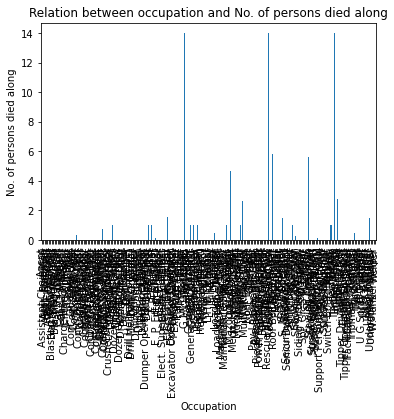

In [58]:
import matplotlib.pyplot as plt
data_grouped.plot(kind='bar')
plt.xlabel("Occupation")
plt.ylabel("No. of persons died along")
plt.title("Relation between occupation and No. of persons died along")
plt.show()


In [59]:

# Group the data by company and age
grouped_data = df.groupby(["Owner Company", "Age of the person"])

# Count the number of accidents for each group
accident_counts = grouped_data["Accident Reason"].count()

# Print the results
print(accident_counts)

Owner Company            Age of the person
 Western Coalfields Ltd  25                   1
Bharat Coking Coal Lt    22                   1
                         24                   1
                         25                   1
                         36                   1
                                             ..
Western Coalfields Ltd.  55                   3
                         56                   2
                         57                   1
                         58                   3
                         60                   1
Name: Accident Reason, Length: 307, dtype: int64
